# Understanding Gender in Dubliners through Computational Literary Analysis

From the <i>Letters 2</i> of James Joyce and supported by a multidude of literary critics, <i>Dubliners</i> can be thought of as an unapologetic and uncensored window into life within Dublin, Ireland. Frank O'Connor, author of the Dubliners literary criticism <i>Work in Progress</i>, claims an even more specific categorization amongst the <i>Dubliners</i>' stories, specifically that "Two Gallants" to "A Painful Case" and including "A Mother" are "harsh naturalistic stories about Dublin middle-class life" (O'Connor 295). Building upon this idea except through a more socio-cultural lens, M. Calle from Universidad de Jaen is able to connect these stories through the occurence of paralysis, gnomon, and simony in <i>Dubliners</i>' women's lives to illustrate "Joyce's vision of gender as a source of oppression" (Calle 29). Calle's essay along with others centered around gender stand out in <i>Dubliners</i>-related literary criticisms, but they stand out for an unfortunate reason. As Calle cites Suzette Henke and Elaine Unkeless, essays analyzing gender in Joyce's collection of short stories are few and often not the center of literary discussion (Calle 29). Furthermore, personal biases from male authored literary criticisms have shown through and created a level of ignorance towards deeper insights of gender relations in <i>Dubliners</i> (350-351 Miller).

Therefore, in order to meet these challenges, I present a computational analysis approach to understand gender within Joyce's <i>Dubliners</i>. In particular, common computational literary analysis techniques such (1) as the counting of specific tokens per chapter, (2) the analysis of ngrams and concordences, and (3) the interpretation of social networks provide a new perspective to the points made by previous gender-centered criticisms and even builds upon them. In the end, computational literary analysis reinforces that Joyce's <i>Dubliners</i> displays the social codes followed by those living in Dublin, limiting the freedom and presence of women.

## Importing, Preprocessing, and Gender Scope

Throughout this notebook, I will be showcasing the code which aids my literary argument. As usual, I will take this time to import and set up the Jupyter environment. Additionally, I'd like to point out that this discussion mainly involves male and female genders, for the spectrum of gender does not seem to be displayed or focused upon in <i>Dubliners</i>.

In [1]:
import nltk
import re
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer, SentimentAnalyzer
import spacy
from wordcloud import WordCloud
from PIL import Image
import networkx as nx
from itertools import combinations 

nlp = spacy.load('en_core_web_lg')
# nltk.download('vader_lexicon')
# ! {"python3 -m pip install gdown"}

import gdown
gdown.download(
    'https://drive.google.com/uc?id=1adrg2wYNa0lAzBLyzozBoSyqAoKiECE3'
)

In [2]:
# use requests for downloading md if not on machine
dubliners = open('../Readings/dubliners.md').read() 

In [3]:
narratives = [t.split('\n\n') for t in dubliners.split('\n##')[1:]]
titles = [t[0].strip().lower() for t in narratives]

# Helper function to erase non-ascii characters
def clean_content(string):
    all_ascii = re.sub(r'[^\x00-\x7F]+', ' ', string)
    return all_ascii.replace('\n', ' ')

# Helper function for punctuation removal
def remove_punc(string):
    punc_reg = r'[!@#$%^&*().\[\]\"\',?;:-]'
    semi_clean = re.sub(punc_reg, ' ', string)
    
    # manual clean
    semi_clean = re.sub("  ", ' ', semi_clean)
    semi_clean = re.sub("   ", ' ', semi_clean)
    semi_clean = re.sub("    ", ' ', semi_clean)
    semi_clean = re.sub(" ;", ';', semi_clean)
    semi_clean = re.sub(" ,", ',', semi_clean)
    
    return semi_clean.replace('\n', ' ').strip()

# Using a Dubliners reference dictionary for ease-of-use
contents = [clean_content(' '.join(t[1:])) for t in narratives]
dubliners_dict = {titles[i]: {
        'content':contents[i],
        'tokens': nltk.word_tokenize(remove_punc(contents[i].lower())),
        'punc_tokens': nltk.word_tokenize(contents[i].lower()),
        'sent': nltk.sent_tokenize(contents[i])
    } for i in range(len(titles))
}

Now that I have set up the Jupyter environment, we can begin with the first example of computational analysis on <i>Dubliner</i>'s content.

## Analysis of Gender Mentions Per Narrative

Jane E. Miller, author of <i>Dubliner</i> criticism <i>"'O, She's a Nice Lady!": A Rereading of "A Mother"</i>, makes an interesting observation when analyzing where "A Mother" is placed in regard to the other narratives.

> "The placement of 'A Mother' in the collection (between two
stories almost exclusively concerned with men) reinforces the fact
that Mrs. Kearney is outnumbered and out of place: she has trespassed into the midst of a male-dominated world..." (Miller 361).

Using the power of computational analysis, digital humanities scientists can conduct the same experiment to the whole Dubliner text by capturing tokens per narrative and wrapping the tokens in narrative-associated Counter objects. The code and results are presented below.

In [4]:
# Making counters per narrative
dubliners_counts = {
    title: Counter(dubliners_dict[title]['tokens']) for title in dubliners_dict.keys()
}

# Collecting gender pronouns
male_pronouns = [
    'he', 'him', 'his', 'mr', 'man', 'men', 'sir', 'boy', 'boys', 'gentleman', 'gentlemen',
    'gents', 'lad', 'lads'
]
female_pronouns = [
    'she', 'her', 'hers', 'mrs', 'miss', 'woman', 'women', 'madam', 'lady', 'ladies', 'girl', 'girls', 
    'gals', 'gal'
]

# Aggregating gender pronouns per narrative
binary_pronouns = {
    title: {
        'man': np.sum([
            dubliners_counts[title][male_pro] for male_pro in male_pronouns
        ]),
        'woman': np.sum([
            dubliners_counts[title][female_pro] for female_pro in female_pronouns
        ])
    } for title in titles
}

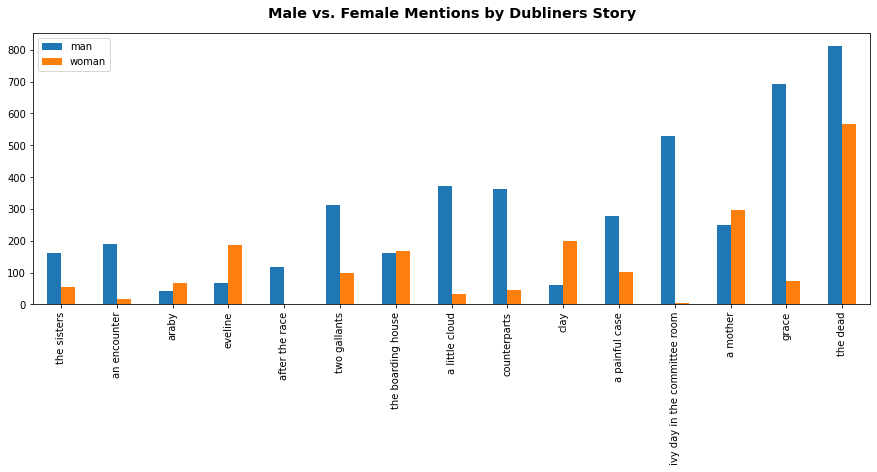

In [5]:
binary_breakdown = pd.DataFrame(binary_pronouns).T
binary_breakdown.iloc[:, :2].plot(kind='bar', figsize=(15, 5))
plt.title('Male vs. Female Mentions by Dubliners Story', pad=15, fontdict={
    'fontweight': 'bold', 'fontsize': 'x-large'
})
plt.show()

From quick observation, it is obvious that men dominate the narrative in terms of mentions within <i>Dubliners</i>. What's more astounding is that the male dominated narratives surround the female dominated narratives, except for the instance between "Araby" and "Eveline". Futhermore, the female mentions are overshadowed by the male mentions of the surrounding male-dominated stories. From this figure of male versus female mentions, Miller's observation of the structure of <i>Dubliners</i> reaches farther than what she initially thought. 

However, is Miller's connection between organization and the impact of transgressing social codes in "A Mother" applicable to the other stories and other women in <i>Dubliners</i>? M. Calle has a different perspective in her essay <i>Lives of Girls and Women: Female Characters in Dubliners</i>. Calle somewhat agrees with Miller, for she describes Mrs. Kearney, the main protagonist in "A Mother," as a "victim of her greed and frustration, but also of a male-dominated power structure of bourgeois impresarios who control Dublin culture" (35). Yet the closest women associated with Mrs. Kearney from Calle's perspective are the servant girl from "Two Gallants," a victim of sexual and monetary exploitation, and Mrs. Mooney from "The Boarding House," a victimizer who convinces a man to engage in marriage with her daughter for her honor and prosperity<sup>*</sup>. Diverging away from the victim or victimizer personas, Calle describes some women as falling under the paralysis of their decisions or their circumstances such as in "Eveline" or "A Painful Case", and other women such as the sisters in "The Sisters" or Mangan's sister in "Araby" are described as "gnomic" in that their physical body is seldom present but their presence is felt (33). Finally, in "The Dead," Miss Ivors, the intellectual equal to the protagonist Gabriel, and Gretta, Gabriel's wife who commits to finding love even when her husband does not give it, are unlike the other women: directly challenging and breaking through barriers that confine them.

Based on Calle's insights, perhaps Miller's connection between structure and violation of the male-dominated sphere is not as strongly felt throughout the book, but that does not mean that the structure of <i>Dubliners</i> cannot have multiple meanings. The overshadowing mentions can act as symbols of paralysis, especially when plotted similar to above with the bars acting as walls. Additionally, the mentions of men appear to dwarf the mentions of women, acting as an implicit erasure of their presence. All aforementioned ideas comes together and thus can be reflected by the <i>Dubliners</i>'s structure, that is, the limitations of Dublin women in regard to their freedom and presence.

___

<sup>*</sup> The motivation behind Mrs. Mooney's marriage arrangement is not simply an ensnaring of a dubious individual. M. Calle acknowledges this by stating how "the narrow confines of the Irish society of the early twentieth century, defined by economic depression and lack of professional opportunities for both men and women fostered mercenary attitudes towards marriage, and mercantile sexuality." (30)

## Analysis of Ngram Descriptions and Concordence Windows of Gender

The structure of <i>Dubliners</i> symbolizes the experience of women in Dublin, but it still remains to be seen how it actually manifests within daily life. To answer this question, we can consider the words that describe and surround the genders presented in the novel. Ngram querying is a common computational analysis technique, and this will be one of the the strategies to find the words that describe the genders, especially since we can query (ADJ)-(GENDER PRONOUN), (GENDER PRONOUN)-(VB)-(ADJ), and (GENDER PRONOUN)-(VB) combinations. To find words which surround gender pronouns, we will use concordence windows of size 20 to find adjectives, adverbs, verbs, and nouns. Once the words have been collected, wordcloud plots are generated for ease-of-interpretation: the larger the word, the more it was used to describe the gender or the more it was found around the gender mentioned. The code is broken down by subheadings.

### Collection of Ngram Descriptions

In [6]:
# Helper function for grabbing ngrams that match a certain pattern (pos + word accepted)
# key_index paramater used to get a certain word from the ngram that matches the given pattern
def ngram_pos(tokens, gram_list, key_index=None):
    pos = nltk.pos_tag(tokens)
    n = len(gram_list)
    
    matched_grams = []
    for i in range(len(pos) - n):
        bool_arr = all([
            pos[i + k][0].lower() in gram_list[k] or pos[i + k][1] in gram_list[k] for k in range(n)
        ])
        
        # Filtering step in order to not saturate description words with insignificant words
        bool_arr2 = all([pos[i + k][0].lower() not in stopwords.words('english') for k in range(n)])
        
        if bool_arr and bool_arr2:
            proposed_gram = [pos[i + j][0] for j in range(n)]
            matched_grams.append(
                ' '.join(proposed_gram) if key_index == None else proposed_gram[key_index]
            )
    return matched_grams

In [7]:
# Collecting male and female pronouns and aggregating them under man and woman for each narrative, respectively
binary_ngrams = {
    title: {
        'man': ngram_pos(
            dubliners_dict[title]['punc_tokens'], [male_pronouns, ['VBD'], ['JJ']], key_index=2
        ) + ngram_pos(
            dubliners_dict[title]['punc_tokens'], [['JJ'], male_pronouns], key_index=0
        ) + ngram_pos(
            dubliners_dict[title]['punc_tokens'], [male_pronouns, ['VBD', 'VB']], key_index=1
        ),
        'woman': ngram_pos(
            dubliners_dict[title]['punc_tokens'], [female_pronouns, ['VBD'], ['JJ']], key_index=2
        ) + ngram_pos(
            dubliners_dict[title]['punc_tokens'], [['JJ'], female_pronouns], key_index=0
        ) + ngram_pos(
            dubliners_dict[title]['punc_tokens'], [female_pronouns, ['VBD', 'VB']], key_index=1
        )
    } for title in titles
}

In [8]:
binary_ngrams_df = pd.DataFrame(binary_ngrams).T

# Combining narrative pronoun counts into man and woman pronoun counters for whole text analysis
set_of_words = set()
binary_word_counter_dict = {'man': Counter(), 'woman': Counter()}
for i in range(binary_ngrams_df.shape[0]):
    row_i = binary_ngrams_df.iloc[i, :]
    male_i_counter = Counter(row_i['man'])
    female_i_counter = Counter(row_i['woman'])
    
    for word in male_i_counter.keys():
        set_of_words.add(word)
        binary_word_counter_dict['man'][word] += male_i_counter[word]
    for word in female_i_counter.keys():
        set_of_words.add(word)
        binary_word_counter_dict['woman'][word] += female_i_counter[word]

In [9]:
# Wrapping dictionary in dataframe for easy of calculation
# Including diff column: negative value = used more to desc. women, positive value = used more to desc. men
binary_word_df = pd.DataFrame(binary_word_counter_dict).fillna(0.0)
binary_word_df['diff'] = binary_word_df['man'] - binary_word_df['woman']

### Collection of Concordence Adjectives, Adverbs, Verbs, and Nouns within Given Window

Source code for the two functions below can be found here: https://blog.ouseful.info/2015/12/13/n-gram-phrase-based-concordances-in-nltk/. Per request of the creative commons license 3.0, here is the link to the specific license: https://creativecommons.org/licenses/by/3.0/legalcode. No changes were made to the specific source code, but it was used in the process to do computational literary analysis.

In [10]:
def n_concordance_tokenised(text, phrase, left_margin=5, right_margin=5):
    phraseList=phrase.split(' ')
    c = nltk.ConcordanceIndex(text.tokens, key = lambda s: s.lower())
    offsets=[c.offsets(x) for x in phraseList]
    offsets_norm=[]
    for i in range(len(phraseList)):
        offsets_norm.append([x-i for x in offsets[i]])
    intersects=set(offsets_norm[0]).intersection(*offsets_norm[1:])
 
    concordance_txt = (
        [
            text.tokens[
                list(
                    map(
                        lambda x: x-left_margin if (x-left_margin)>0 else 0,[offset]
                    )
                )[0]:offset + len(phraseList) + right_margin
            ] for offset in intersects
        ]
    )
 
    outputs=[''.join([x+' ' for x in con_sub]) for con_sub in concordance_txt]
    return outputs
 
def n_concordance(text, phrase, left_margin=5, right_margin=5):
    return n_concordance_tokenised(text,phrase,left_margin=left_margin,right_margin=right_margin)

In [11]:
# Combining Dubliners content in order to tokenize and pass through Spacy analyzer
dubliners_content = ' '.join([dubliners_dict[title]['content'] for title in titles])
dubliners_text = nltk.Text(nltk.word_tokenize(dubliners_content))
dubliners_doc = nlp(dubliners_content)

In [12]:
# Getting Spacy identified people as a filter for concordence found words
dubliners_ppl = set([ent.text.lower() for ent in dubliners_doc.ents if ent.label_ == 'PERSON'])

In [13]:
conc_word_counter_dict = {'man': Counter(), 'woman': Counter()}

# Helper function for concordence generation and word finding within concordence
def update_counter_dict(gender_pronoun, gender, l=10, r=10):
    a_concordance = n_concordance(dubliners_text, gender_pronoun, left_margin=l, right_margin=r)
    for conc in a_concordance:
        conc_tokens = nltk.word_tokenize(conc)
        conc_pos = nltk.pos_tag(conc_tokens)
        for word, word_pos in conc_pos:
            clean_word = remove_punc(word).lower()
            bool1 = clean_word not in male_pronouns + female_pronouns + stopwords.words('english')
            bool2 = word_pos in ['JJ', 'JJR', 'JJS', 'VB', 'VBD', 'RB', 'RBR', 'RBS','NN']
            bool3 = word.islower()
            bool4 = clean_word not in dubliners_ppl
            bool5 = ' ' not in clean_word
            if bool1 and bool2 and bool3 and bool4 and bool5:
                conc_word_counter_dict[gender][clean_word] += 1

# Collecting words
for gender_pronoun in male_pronouns:
    update_counter_dict(gender_pronoun, 'man')
                
for gender_pronoun in female_pronouns:
    update_counter_dict(gender_pronoun, 'woman')

In [14]:
# Wrapping dictionary in dataframe for easy of calculation
# Including diff column: negative value = used more to desc. women, positive value = used more to desc. men
conc_word_df = pd.DataFrame(conc_word_counter_dict).fillna(0.0)
conc_word_df['diff'] = conc_word_df['man'] - conc_word_df['woman']

### Generating James Joyce Wordclouds for Easy Interpretation

In [15]:
# Set of description words found in both ngrams and concordences
set_of_all_words = Counter(np.concatenate([conc_word_df.index.values, binary_word_df.index.values])).keys()

In [16]:
# Combining male and female counters
man_counter = conc_word_counter_dict['man'] + binary_word_counter_dict['man']
woman_counter = conc_word_counter_dict['woman'] + binary_word_counter_dict['woman']

man_words = []
woman_words = []

# Extracting words that have been used to describe one gender more than the other
for word in set_of_all_words:
    man_word_count = man_counter[word]
    woman_word_count = woman_counter[word]
    
    # The word is weighted by the absolute difference between gender description usage/local occurence.
    # This allows emphasis of words which were more associated with one gender instead of the other.
    if man_word_count > woman_word_count:
        man_words.extend([word] * abs(woman_word_count - man_word_count))
    if man_word_count < woman_word_count:
        woman_words.extend([word] * abs(woman_word_count - man_word_count))

In [17]:
# Using James Joyce photo as word cloud shape guidance
jj = np.array(Image.open("james_joyce.jpg"))

male_wordcloud = WordCloud(
    collocations=False, background_color="black", max_words=2000, mask=jj,
    contour_width=1, contour_color='steelblue'
)
male_wordcloud = male_wordcloud.generate(','.join(man_words))
female_wordcloud = WordCloud(
    collocations=False, background_color="black", max_words=2000, mask=jj,
    contour_width=3, contour_color='steelblue'
)
female_wordcloud = female_wordcloud.generate(','.join(woman_words))

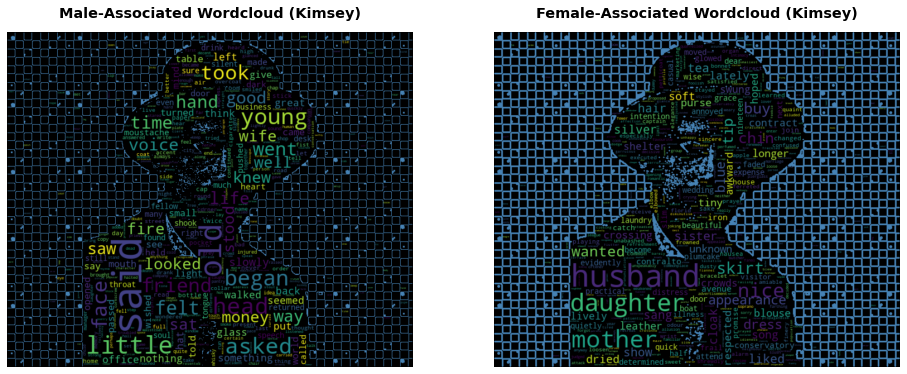

In [18]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Male-Associated Wordcloud (Kimsey)', pad=15, fontdict={
    'fontweight': 'bold', 'fontsize': 'x-large'
})
plt.imshow(male_wordcloud, interpolation='bilinear')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title('Female-Associated Wordcloud (Kimsey)', pad=15, fontdict={
    'fontweight': 'bold', 'fontsize': 'x-large'
})
plt.imshow(female_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Based on the wordcloud plots, it appears that Dublin men associate more with talking. There is also the presence of young, old, friends, and money. On the other hand, Dublin women seem to be associated with the household or family titles such as husband, mother, daughter, and sister. There is also an emphasis on appearance and clothing apparal. Using this as a heurstic for understanding gender roles in Dublin without reading <i>Dubliners</i>, digital humanities scientists might guess that women were moreso associated with the household and had strong involvement and presence in such spaces. As for the men, those same scientists might focus on the size of "said" and reason that they often had their voices heard. 

As it turns out, the word clouds reinforce the reality of gender roles in Dublin. Jane E. Miller's literary criticism touches upon specific examples which match with messages given by the word clouds. Miller writes,

> "The burgeoning nationalist movement for Home Rule and its allied organizations such as the Gaelic League, which promoted Irish language and culture, provided significant opportunities for women to further their education and work outside of the home in a socially acceptable fashion. But while the sphere of activity for women was enlarged, their status remained unaltered. For the most part, women were assigned traditionally "feminine" tasks in the nationalist organizations; they were involved with cultural events and other fundraising activities but were expected to stay in the background when it came to political issues and policymaking" (354).

Miller even describes how violations of these social codes were met with severity.

> "Many women involved in the campaign for Home Rule naturally became interested in working for their own political representation. But predominantly Catholic Ireland viewed women who demanded equality with alarm and suspicion: the feminists and suffragists were criticized and often ostracized from nationalist organizations for distracting the public's attention from the more 'important' issue of Home Rule" (354).

In a sense, the word clouds are similar to the structure of <i>Dubliners</i> as they represent a limitation of freedom and presence for women. Specifically, the word clouds illustrate the priveleges allocated to each gender, where voice is the primarily for men and the house or the backseat is primarily for women. Perhaps one can go as far to say that these word clouds are the vocabulary which spell the social codes enforced in Dublin society.

## The Network of Men, Women, and Cities in <i>Dubliners</i>

Since it has been shown that women are confined to a realm of social priveleges (or lack thereof), it begs the question of whether or not <i>Dubliners</i> illustrates women as physically confined. The narrative of "Eveline" seems to hint at this reality, and using Spacy to extract locations and places, we can build a social network of men, women, and named spaces to answer this question. The steps to build the graph are displayed below.

In [19]:
# Using Spacy to get locations and places and then using a lowercased set for normalization
dubliners_places = [ent for ent in dubliners_doc.ents if ent.label_ == 'GPE' or ent.label_ == 'LOC']
dubliners_places_text = set([d.text.lower() for d in dubliners_places])

# Aggregating pronouns and creating a reference dictionary for mapping back to origin
dubliners_pn_dict = {'man': male_pronouns, 'woman': female_pronouns}
dubliners_pronouns = male_pronouns + female_pronouns

# Constructing our set of entities by combining places, locations, and pronouns
dubliners_entities = dubliners_pronouns + [d.text.lower() for d in dubliners_places]
dubliners_entities = set([n for n in dubliners_entities])
dubliners_entities = list(dubliners_entities)

# Creating entity pairs and splitting Dubliners content for edge weight construction
entity_pairs = {pair: 0 for pair in list(combinations(dubliners_entities, 2))}
dubliners_paragraphs = dubliners.split('\n\n')
for p in dubliners_paragraphs: 
    for entity_pair in entity_pairs:
        if entity_pair[0] in p.lower() and entity_pair[1] in p.lower():
            entity_pairs[entity_pair] += 1
            
# Getting rid of useless connections
entity_pairs = {pair: entity_pairs[pair] for pair in entity_pairs.keys() if entity_pairs[pair] > 0}

# Reaggregating node pairs by mapping back to origin gender
pronoun_pairs = {}
for p1, p2 in entity_pairs.keys():
    if p1 in dubliners_pn_dict['man'] and p2 in dubliners_places_text:
        pronoun_pairs[('man', p2)] = 1 + pronoun_pairs[('man', p2)] if ('man', p2) in pronoun_pairs else 1
    elif p2 in dubliners_pn_dict['man'] and p1 in dubliners_places_text:
        pronoun_pairs[(p1, 'man')] = 1 + pronoun_pairs[(p1, 'man')] if (p1, 'man') in pronoun_pairs else 1
    elif p1 in dubliners_pn_dict['woman'] and p2 in dubliners_places_text:
        pronoun_pairs[('woman', p2)] = 1 + pronoun_pairs[('woman', p2)] if ('woman', p2) in pronoun_pairs else 1
    elif p2 in dubliners_pn_dict['woman'] and p1 in dubliners_places_text:
        pronoun_pairs[(p1, 'woman')] = 1 + pronoun_pairs[(p1, 'woman')] if (p1, 'woman') in pronoun_pairs else 1

In [20]:
# Creating a list of nodes from pairs
node_pronouns = set([p[0] for p, v in pronoun_pairs.items()])
node_pronouns2 = set([p[1] for p, v in pronoun_pairs.items()])
node_pronouns = node_pronouns.union(node_pronouns2)

# Creating graph from nodes and assigning edge weights
graph = nx.Graph()
graph.add_nodes_from(node_pronouns)
for pair, weight in pronoun_pairs.items(): 
    # Adding strong connections to graph above a weight threshold
    if weight > 4.5: 
        graph.add_edge(pair[0], pair[1], weight=weight)

# Removing useless nodes
graph.remove_nodes_from(list([n for n in nx.isolates(graph)]))

In [21]:
def grab_edge_total(gender):
    edge_total = sum(
        [pronoun_pairs[pair] for pair in pronoun_pairs.keys() if pair[0] == gender or pair[1] == gender]
    )
    return edge_total

def grab_inc_total(gender):
    edge_inc = sum(
        [pronoun_pairs[pair] > 0 for pair in pronoun_pairs.keys() if pair[0] == gender or pair[1] == gender]
    )
    return edge_inc

# Collecting total graph stats
graph_stats = pd.DataFrame({
    'man': {'Total Weight': grab_edge_total('man'), 'Total Edges Incident': grab_inc_total('man')},
    'woman': {'Total Weight': grab_edge_total('woman'), 'Total Edges Incident': grab_inc_total('woman')}
})

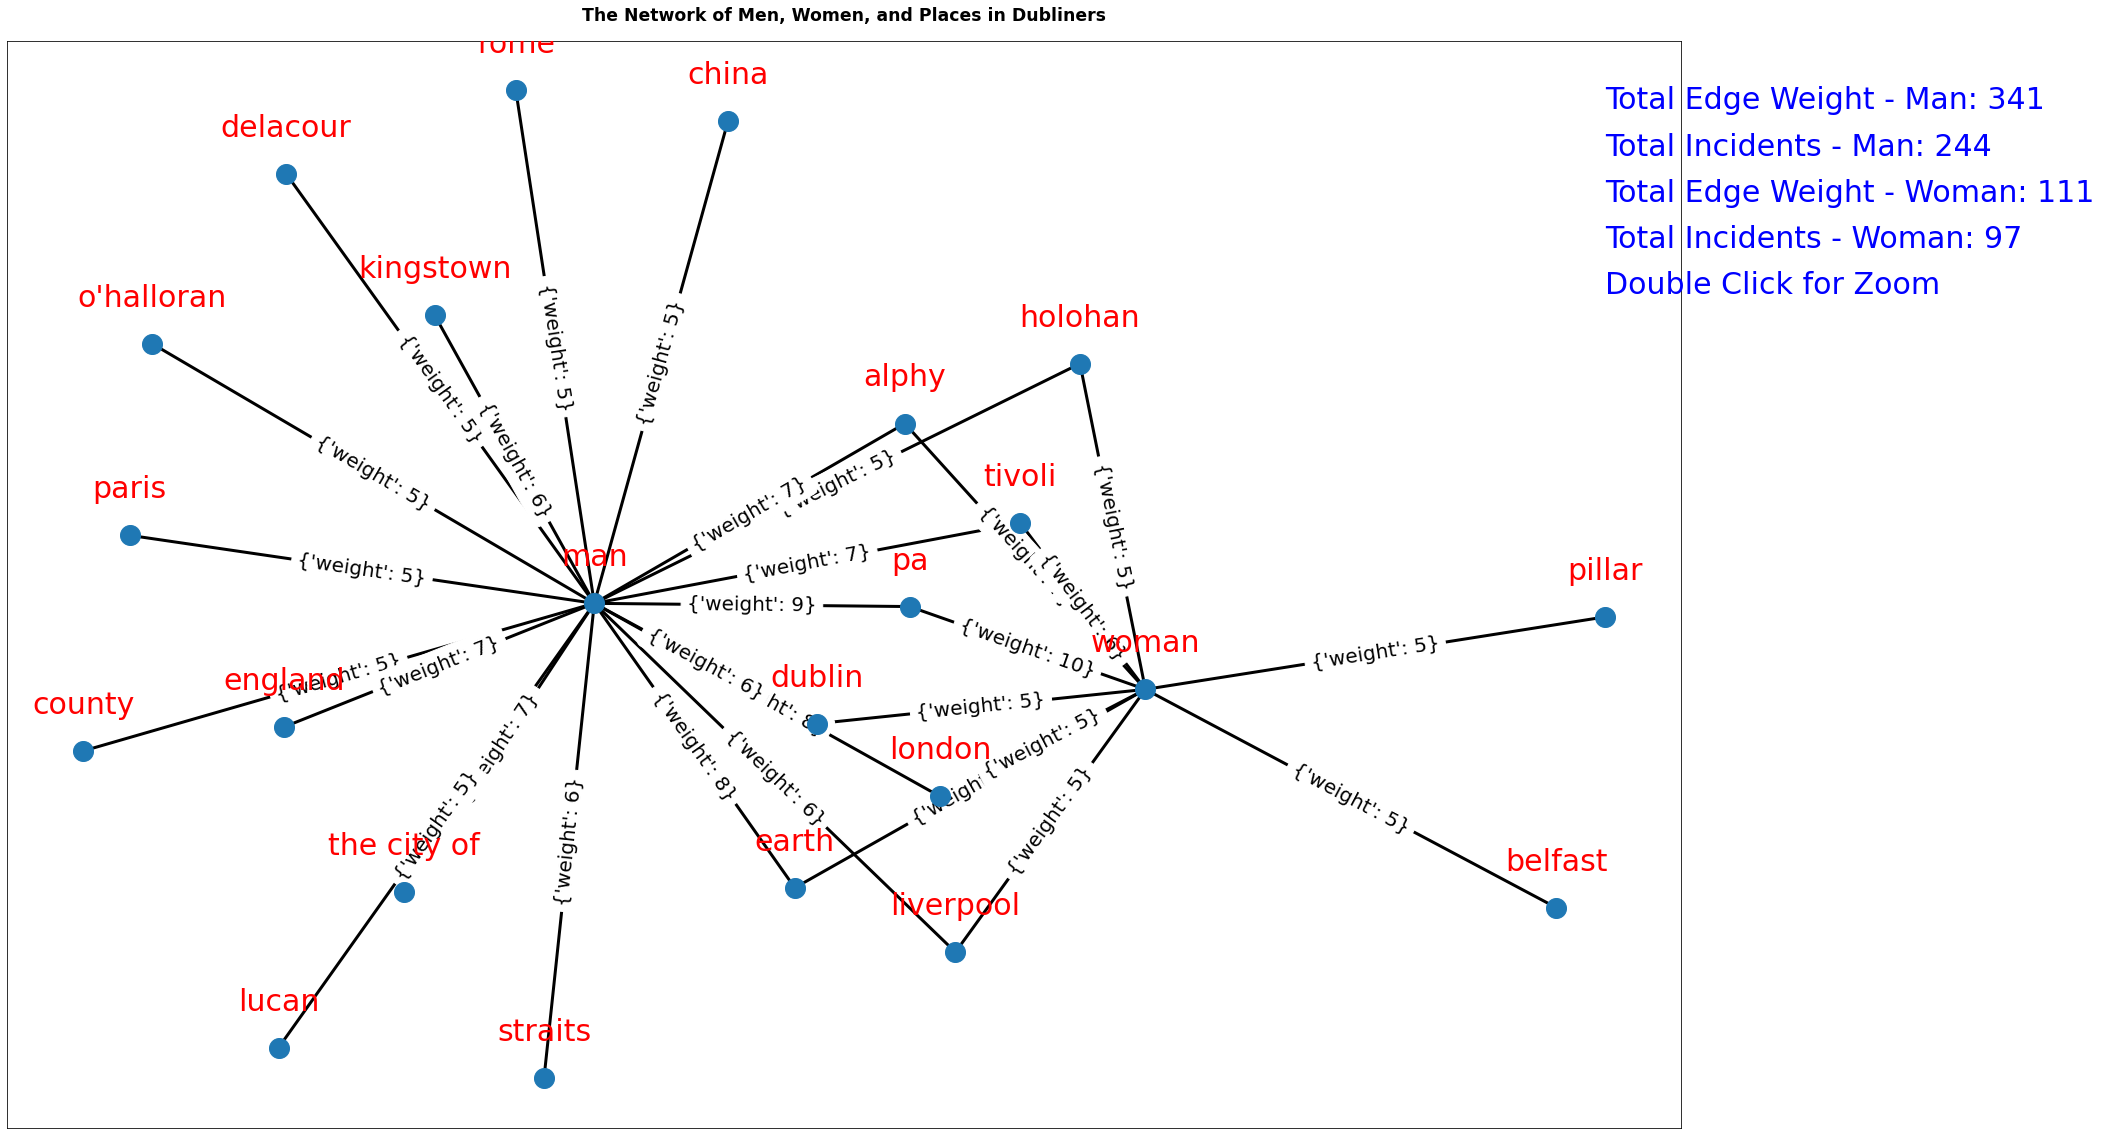

In [22]:
plt.figure(figsize=(30, 20))
pos = nx.spring_layout(graph)

# Creating offset graph positions for legible labels
node_pos = {title: np.array([pos[0], pos[1] - 0.05]) for title, pos in pos.items()}
nx.draw_networkx_nodes(graph, node_pos, node_size=400)
nx.draw_networkx_edges(graph, node_pos, width=3)
nx.draw_networkx_edge_labels(graph, pos=node_pos, font_size=20)
nx.draw_networkx_labels(graph, pos, font_size=30, font_family='sans-serif', figsize=(30,30), font_color='red')
plt.title(
    "The Network of Men, Women, and Places in Dubliners", fontdict={
        'fontsize': 'xx-large', 'fontweight': 'bold'
    },
    pad=20.0
)
plt.text(1, 0.5, 'Total Edge Weight - Man: ' + str(graph_stats.iloc[0, 0]), color='blue', fontsize=30)
plt.text(1, 0.45, 'Total Incidents - Man: ' + str(graph_stats.iloc[0, 1]), color='blue', fontsize=30)
plt.text(1, 0.4, 'Total Edge Weight - Woman: ' + str(graph_stats.iloc[1, 0]), color='blue', fontsize=30)
plt.text(1, 0.35, 'Total Incidents - Woman: ' + str(graph_stats.iloc[1, 1]), color='blue', fontsize=30)
plt.text(1, 0.30, 'Double Click for Zoom', color='blue', fontsize=30)
plt.show()

The total weight of the edges incident to the man node is greater than the total weight of the edges incident to the woman node, and the same relation is observed for node incident totals except the gap is closer. However, the analysis of edge incidence is problematic in that it takes into account weak connections. Therefore, analysis of a heavily weighted graph such as the one plotted above may be of more interest in making judgements about how gender roles are presented in <i>Dubliners</i>. Focusing on the heavily weighted graph, edges with weights greater than or equal to 5 are more incident to the man node than the woman node. Furthermore, nodes belonging to places outside of UK or Ireland are significantly more incident to the man node than the woman node. 

Therefore, the network connecting pronouns and named spaces illustrates how women are not just socially but also physically confined compared to their male counterparts, at least through the understanding of paragraph locality. This gives support to the messages promoted in M. Calle's ideas of character paralysis, and it also gives support to Miller's observation that women are unsuccessful in entering male dominated spheres. From our analysis of pronoun-associated word clouds, Miller's tokens of history, and Calle's insights related to paralysis and victims, one of the major reasons for this confinement is directly related or implicitly influenced by the historical enforcement of social codes. Even Eveline, who appeared to refuse Frank's hand of her own volition, is under the influence of her mother's request to stay at home and the learned obedience to her father. 

## Continuing to Understand Gender through Computational Literary Analysis

Computational literary analysis can be applied to the understanding of texts in a way that has never been done before, especially due to the recent advancements in technology. Leveraging common techniques, scientists and scholars are able to dive into the meaning of texts and perhaps come to the same conclusions as literary critics in a different way or make new discoveries. For instance, through the counting of gender pronouns through the whole book instead of one narrative, a structural pattern of <i>Dubliners</i> reveals itself, but a different interpretation of the structure needs to be adopted in order to encompass a more holisitic view of oppression within each story. Secondly, the visualization of text frequency via wordclouds illustrates the vocabulary used to describe the accepted social normalcies, reinforcing the limitation of women in Dublin's society. Finally, with the help of network analysis, the limitation of women is shown to not only be abstract but also physical. Besides the techniques mentioned in this essay, there are numerous ways to parse text and get different results, such as different cleaning algorithms or the usage of sentiment understanding. Nonetheless, computational literary analysis can help us explore and attempt to answer tough cultural questions, especially questions having to do with past exercises of oppression on women. In fact, I challenge other scholars to utilize these techniques to not only understand past cultural oppression, but also to understand how literature conveys oppression now and in the future.

# Works Cited

Calle, M. Pilar Sánchez. "Lives of Girls and Women: Female Characters in Dubliners." <i>Iberjoyce: Papers on Joyce</i>, edited by Margarita Estevez-Saá and Francisco García Tortosa, Spanish James Joyce Society, 1998, pp. 29–40, www.siff.us.es/iberjoyce/wp-content/uploads/2013/11/S%E2%80%A0nchez_Calle.pdf.

Joyce, James, and Richard Ellmann. <i>Letters of James Joyce: Volumes 2 and 3</i>. Viking Press, 1966.

Kimsey. "Book Black and White." CLEANPNG, Cleanpng.com, 2020, www.cleanpng.com/png-james-joyce-ulysses-dubliners-a-portrait-of-the-ar-6642034/.

Miller, Jane E. ""'O, She's a Nice Lady!'": A Rereading of 'A Mother.'" <i>Dubliners</i>, by James Joyce et al., Penguin Books, 1996, pp. 348–372.

n_concordance. <i>n-gram / Multi-Word / Phrase Based Concordances in NLTK</i>, OUseful.Info, the blog..., 2015. <i>Blog at Wordpress</i>, https://blog.ouseful.info/2015/12/13/n-gram-phrase-based-concordances-in-nltk/

n_concordance_tokenized. <i>n-gram / Multi-Word / Phrase Based Concordances in NLTK</i>, OUseful.Info, the blog..., 2015. <i>Blog at Wordpress</i>, https://blog.ouseful.info/2015/12/13/n-gram-phrase-based-concordances-in-nltk/

O'Connor, Frank. "Work in Progress." <i>Dubliners</i>, by James Joyce et al., Penguin Books, 1996, pp. 292–303.
